Necessary imports:

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib import colors

Implemented gradients:

In [187]:
def hsv2rgb(h, s, v): # supporting function converting hsv to rgb
    hsv = np.zeros(shape=(1, 3), dtype=float)
    hsv[0, 0] = h
    hsv[0, 1] = s
    hsv[0, 2] = v
    rgb = colors.hsv_to_rgb(hsv)
    r, g, b = rgb[0, 0], rgb[0, 1], rgb[0, 2]
    return (r, g, b)

# gradients

def gradient_rgb_bw(v):
    return (v, v, v)


def gradient_rgb_gbr(v):
    red = 0
    green = 0
    blue = 0

    if v <= 1/2:
        green = 1 - (v * 2)
        blue = 2 * v
    else:
        red = (v * 2) - 1
        blue = 2 - (v * 2)

    return (red, green, blue)


def gradient_rgb_gbr_full(v):
    red = 0
    green = 0
    blue = 0

    if v <= 0.25:
        green = 1
        blue = v * 4
    elif v <= 0.5:
        green = 2 - (v * 4)
        blue = 1
    elif v <= 0.75:
        red = (v * 4) - 2
        blue = 1
    else:
        red = 1
        blue = 4 - (v * 4)

    return (red, green, blue)


def gradient_rgb_wb_custom(v):
    red = 1
    green = 1
    blue = 1

    if v <= 1/7:
        green = 1 - (v * 7)
    elif v <= 2/7:
        red = 2 - (v * 7)
        green = 0
    elif v <= 3/7:
        red = 0
        green = (v * 7) - 2
    elif v <= 4/7:
        red = 0
        blue = 4 - (v * 7)
    elif v <= 5/7:
        red = (v * 7) - 4
        blue = 0
    elif v <= 6/7:
        green = 6 - (v * 7)
        blue = 0
    else:
        red = 7 - (v * 7)
        green = 0
        blue = 0

    return (red, green, blue)


def gradient_hsv_bw(v):
    return hsv2rgb(0, 0, v)


def gradient_hsv_gbr(v):
    return hsv2rgb(1/3 + (v * 2)/3, 1, 1)


def gradient_hsv_unknown(v):
    return hsv2rgb(1/3 - v/3, 1/2, 1)


def gradient_hsv_custom(v):
    return hsv2rgb(v, 1 - v, 1)

Supporting functions used for drawing the plot:

In [188]:
def get_name(gradient):
    return gradient.__name__.replace('gradient_', '').replace('_', '-').upper()

def draw_gradients(gradients, names):
    # set the font
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    # set other paramethers
    plt.rc('legend', fontsize=10)

    column_width_pt = 400 # Show in latex using \the\linewidth
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        # Create image with two lines and draw gradient on it
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3] / 2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

    fig.savefig('gradients.pdf')

Main function:

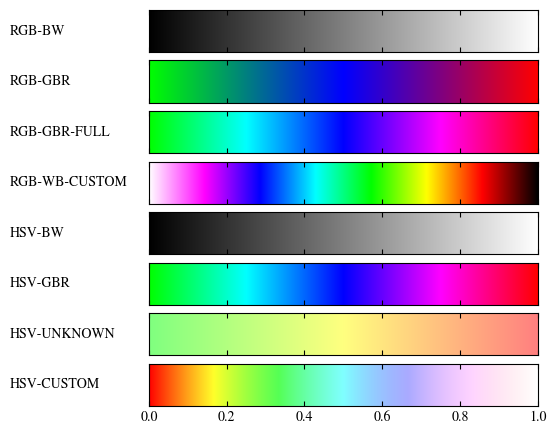

In [189]:
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
                 gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

draw_gradients(gradients, [get_name(g) for g in gradients])

Map gradient:

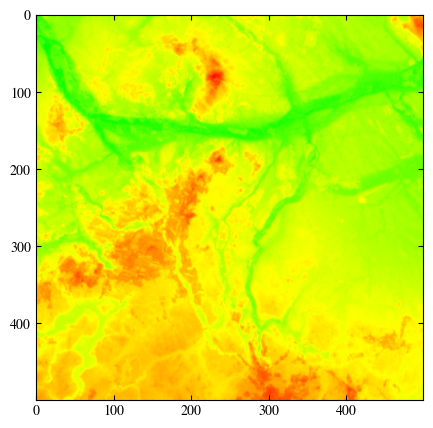

In [190]:
def read_file(file_path) -> tuple[pd.DataFrame, pd.DataFrame]:
    header = pd.read_csv(file_path, nrows=1, header=None, sep=r'\s+')
    data_reader = pd.read_csv(file_path, skiprows=1, header=None, sep=r'\s+')

    return header, data_reader

# TODO:
# def calculate_normals(data, distance) -> np.ndarray:
#     normal_vectors = np.zeros((params.loc[0, 0] - 1, params.loc[0, 1] - 1, 3))

#     for i, row in data[:-1].iterrows():
#         for col in data.columns[:-1]:
#             print(i, col)
    # math.acos((c**2 - b**2 - a**2)/(-2.0 * a * b)

def map_gradient(v):
    return hsv2rgb(1/3 - (((v - 44) / 110) / 3), 1, 1)

def draw_map(params, data):
    # set the font
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['ytick.right'] = True
    plt.rcParams['ytick.left'] = True
    
    fig, ax = plt.subplots(figsize=(5, 5))

    img = np.zeros((params.loc[0, 0], params.loc[0, 1], 3))
    for i, row in data.iterrows():
        for col in data.columns:
            img[i, col] = map_gradient(row[col])

    im = ax.imshow(img, aspect='auto')
    im.set_extent([0, params.loc[0, 0] - 1, params.loc[0, 1] - 1, 0])

    fig.savefig('map.pdf')


params, data = read_file('data/big.dem')
# calculate_normals(data, params.loc[0, 2])
draw_map(params, data)